In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import model.model
import model.helpers as helpers
import model.agents as agents
import visualisation
import visualisation.l1
import visualisation.meta
import visualisation.dimscrap

from model.model import ReductionModel
from model.helpers import load_vectors, generate_word_vectors, generate_zipfian_sample, load_info, compute_average_vocabulary, compute_mean_communicative_success_per_token

In [3]:
from model.types.neighbourhood import NeighbourhoodTypes
from model.types.production import ProductionModels
from model.types.reduction import ReductionModes
from model.types.feedback import FeedbackTypes
from model.types.repair import Repair

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [5]:
NUM_AGENTS = 25
NUM_DIMENSIONS = 50
NUM_TOKENS = 100
# vectors, tokens, frequencies, percentiles = load_vectors(f"materials/vectors-{NUM_DIMENSIONS}.txt")
tokens, frequencies, percentiles, ranks = load_info(f"vectors/theoretical-percentile-info-{NUM_TOKENS}.tsv", theoretical=True)
# Overwrite vectors with my own
vectors = generate_word_vectors(vocabulary_size=len(tokens), dimensions=NUM_DIMENSIONS)

In [ ]:
STEPS_COUNT = 10000
model = ReductionModel(NUM_AGENTS, vectors, tokens, frequencies, percentiles, ranks,
                       initial_token_count=6,
                       neighbourhood_size=10, 
                       neighbourhood_type=NeighbourhoodTypes.NEAREST,
                       reduction_prior=0.5,
                       production_model=ProductionModels.SINGLE_EXEMPLAR,
                       reduction_mode=ReductionModes.ALWAYS,
                       feedback_type=FeedbackTypes.NO_FEEDBACK,
                       repair=Repair.NO_REPAIR,
                       datacollector_step_size=50,
                       disable_reduction=False,
                       prefill_memory=True)
# model.agents[0].indices_in_memory
model.step()
for _ in tqdm(range(STEPS_COUNT), total=STEPS_COUNT):
    model.step()

Lower dimension limit is 5


/home/local/anthe/Projects/fwo-frequency-reduction/model/helpers.py:163: RuntimeWarning: Mean of empty slice
  return np.nanmean(model.success_per_token / (model.success_per_token + model.failure_per_token))


  0%|          | 0/10000 [00:00<?, ?it/s]

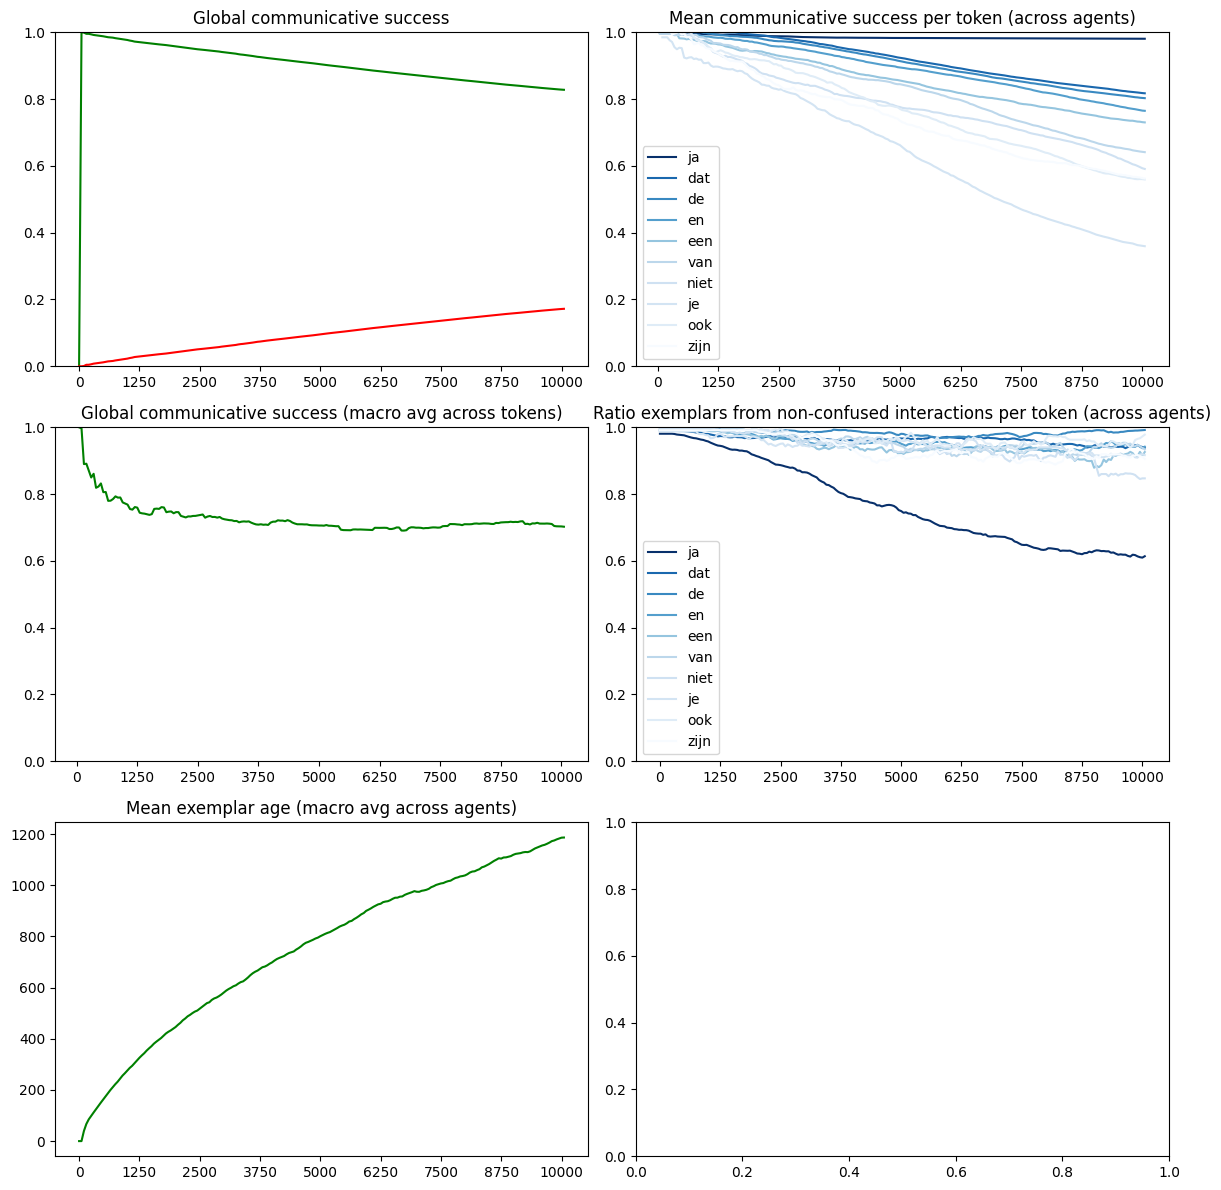

In [80]:
visualisation.meta.combine_plots(model,
    lambda model, ax: visualisation.dimscrap.make_communication_plot(model, ax=ax, smooth=False),
    visualisation.l1.communicative_success_first_n,
    lambda model, ax: visualisation.l1.make_communicative_success_macro_plot(model, ax=ax, smooth=False),
    lambda model, ax: visualisation.l1.token_good_origin_first_n(model, ax=ax),
    lambda model, ax: visualisation.l1.make_mean_exemplar_age_plot(model, ax=ax, smooth=False),
    lambda model, ax: ax,
    )

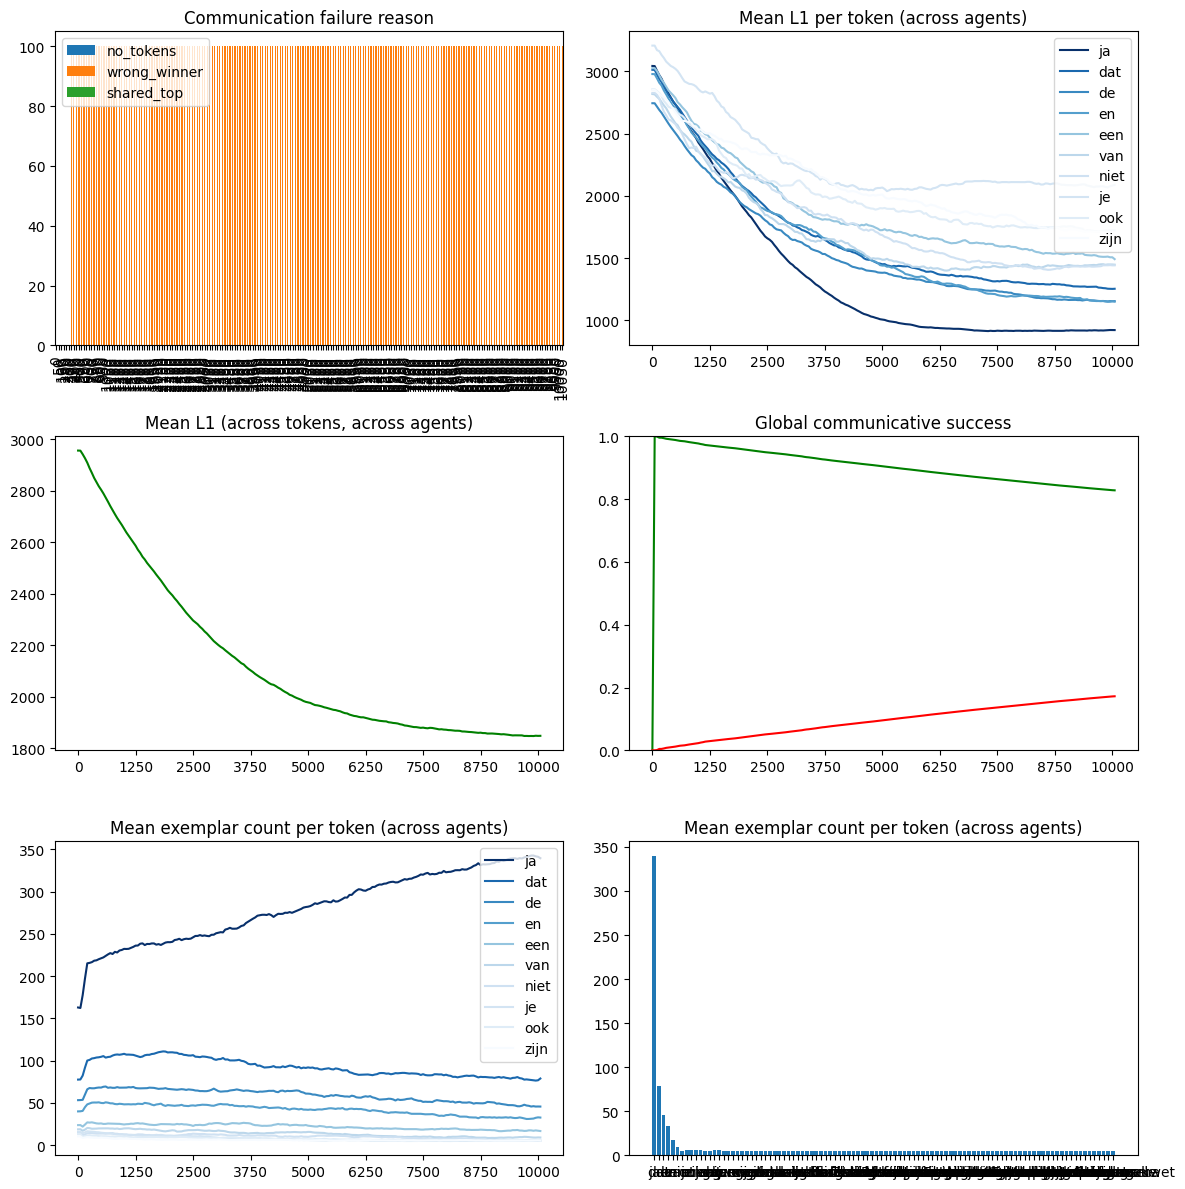

In [81]:
visualisation.meta.combine_plots(model,
            visualisation.l1.make_fail_reason_plot,
            visualisation.l1.words_l1_plot_first_n,
            lambda model, ax: visualisation.l1.make_mean_l1_plot(model, ax=ax, smooth=False),
            lambda model, ax: visualisation.dimscrap.make_communication_plot(model, ax=ax, smooth=False),
            visualisation.l1.words_mean_exemplar_count_first_n,
            visualisation.l1.words_mean_exemplar_count_bar)

/home/local/anthe/Projects/fwo-frequency-reduction/visualisation/meta.py:63: RuntimeWarning: invalid value encountered in divide
  labels = model.tokens[0:n]
/home/local/anthe/Projects/fwo-frequency-reduction/visualisation/meta.py:63: RuntimeWarning: invalid value encountered in divide
  labels = model.tokens[0:n]
/home/local/anthe/Projects/fwo-frequency-reduction/visualisation/meta.py:63: RuntimeWarning: invalid value encountered in divide
  labels = model.tokens[0:n]
/home/local/anthe/Projects/fwo-frequency-reduction/visualisation/meta.py:63: RuntimeWarning: invalid value encountered in divide
  labels = model.tokens[0:n]


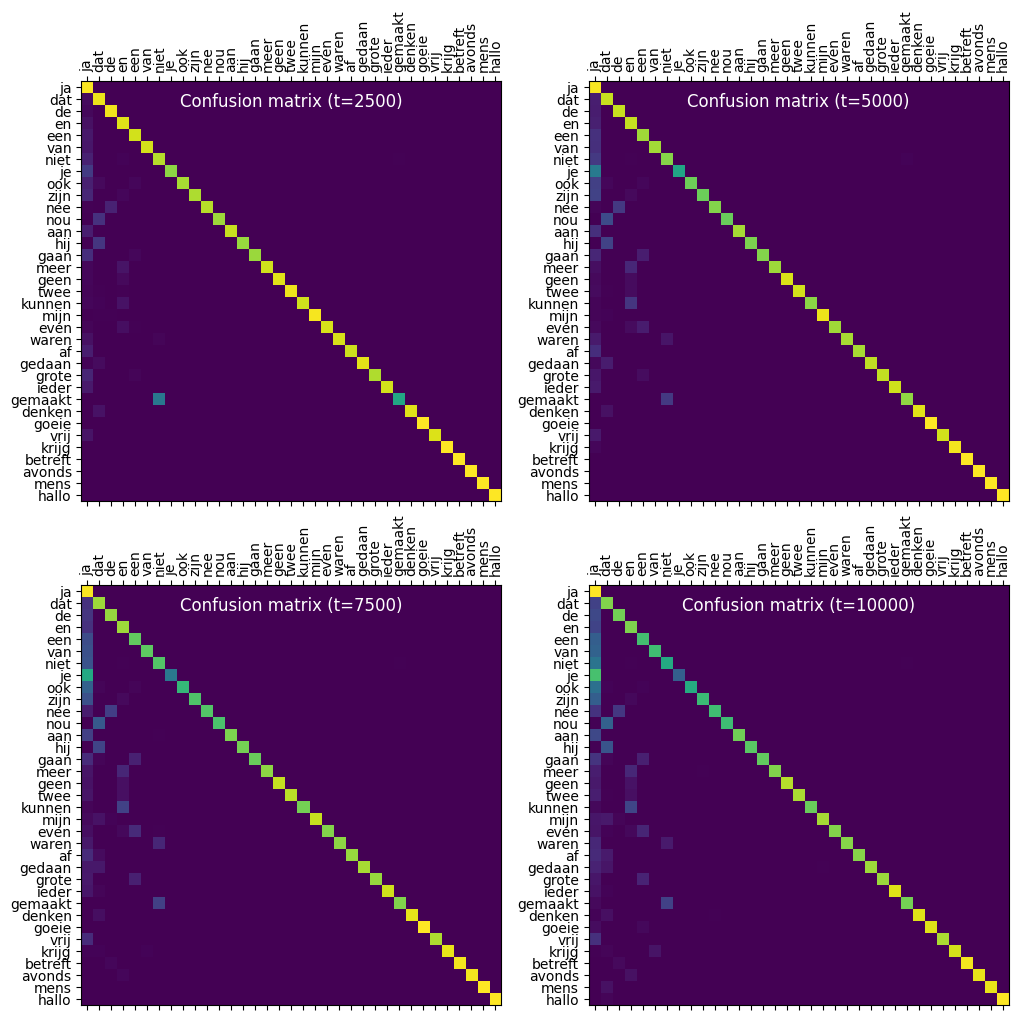

In [76]:
visualisation.meta.make_layout_plot(model,
                                    visualisation.meta.make_confusion_plot,
                                    n=35, steps=[math.floor(model.current_step / 4) * 1,
                                                 math.floor(model.current_step / 4) * 2,
                                                 math.floor(model.current_step / 4) * 3, model.current_step])

/home/local/anthe/Projects/fwo-frequency-reduction/venv/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/local/anthe/Projects/fwo-frequency-reduction/venv/lib64/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/local/anthe/Projects/fwo-frequency-reduction/venv/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/local/anthe/Projects/fwo-frequency-reduction/venv/lib64/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/local/anthe/Projects/fwo-frequency-reduction/venv/lib64/python3.11/site-packages/skl

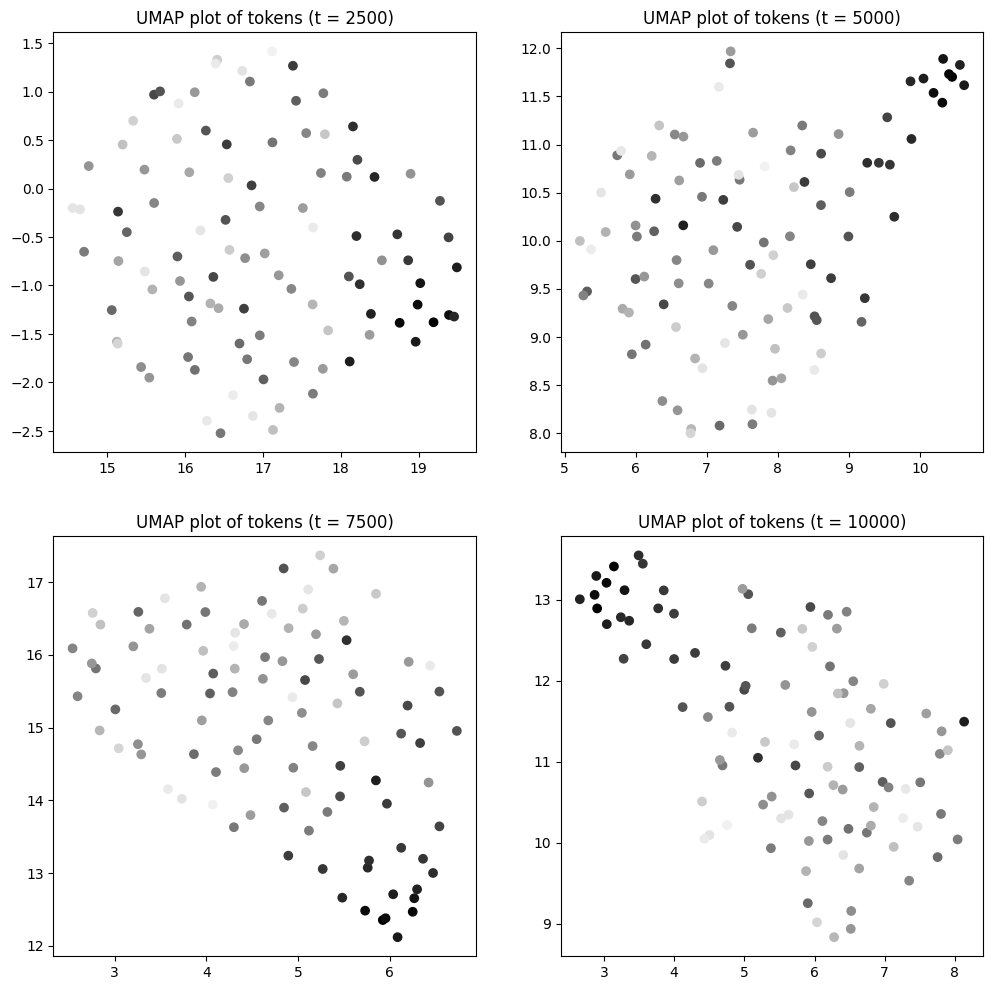

In [77]:
visualisation.meta.make_layout_plot(model,
                                    visualisation.meta.make_umap_plot,
                                    steps=[math.floor(model.current_step / 4) * 1,
                                           math.floor(model.current_step / 4) * 2,
                                           math.floor(model.current_step / 4) * 3,
                                           model.current_step])

/home/local/anthe/Projects/fwo-frequency-reduction/venv/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/local/anthe/Projects/fwo-frequency-reduction/venv/lib64/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/local/anthe/Projects/fwo-frequency-reduction/venv/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/local/anthe/Projects/fwo-frequency-reduction/venv/lib64/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/local/anthe/Projects/fwo-frequency-reduction/visualisation/meta.py:133: UserWarning:

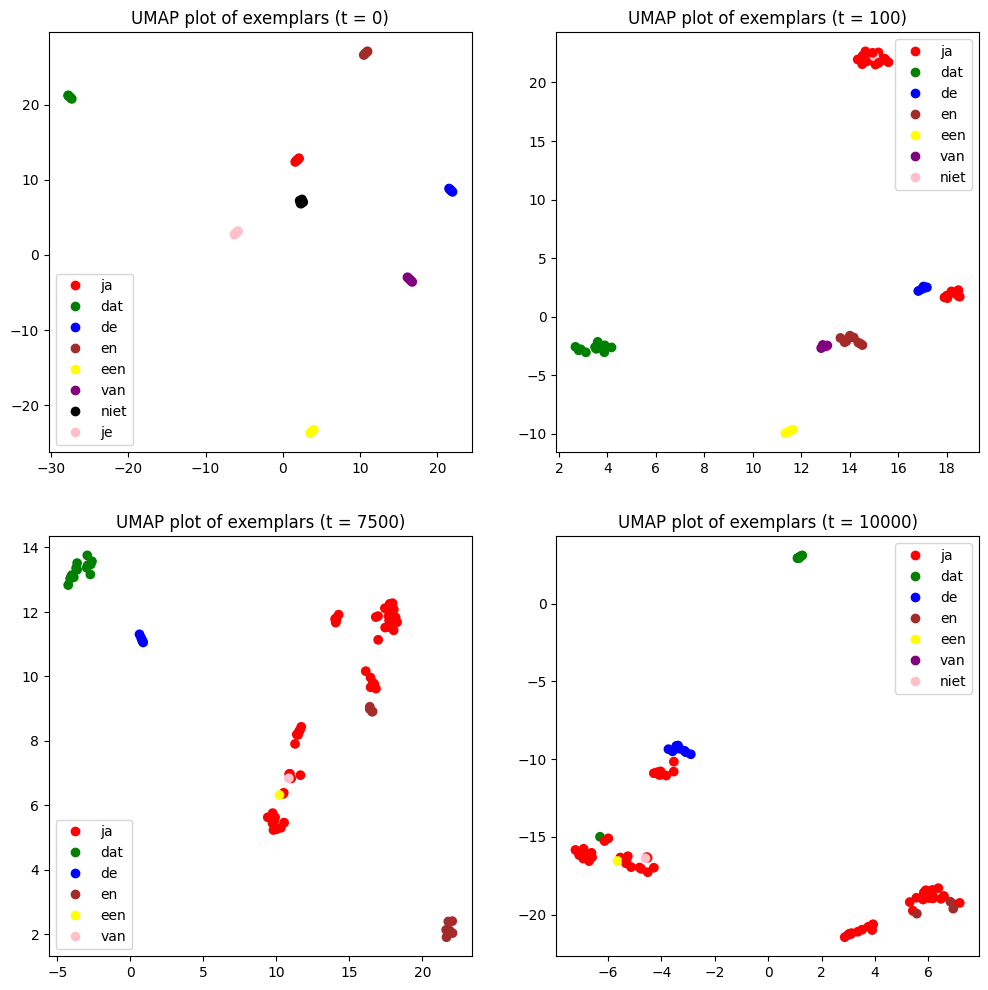

In [78]:
visualisation.meta.make_layout_plot(model,
                                    visualisation.meta.make_umap_full_vocabulary_plot,
                                    steps=[0,
                                           100,
                                           math.floor(model.current_step / 4) * 3,
                                           model.current_step],
                                    n=8)

In [254]:
np.set_printoptions(threshold=np.inf)

model.datacollector.get_model_vars_dataframe()["average_vocabulary"].iloc[0]

array([[ 61.02615971, 102.03080961,  24.08280784,  81.16082852,
         70.14314086,  29.95317844,  92.28650395,  96.01157618,
         84.02589985,  83.9914311 ,  97.15462632, 109.02663691,
         33.07309168,  12.09679131,  31.03658206,  62.02972582,
         11.17141794,  97.10931788,  39.01142214,  47.05267256,
         10.94876582,  73.05573432,  68.9581191 ,  30.04916436,
         42.16944931,  84.95440497,  67.1459502 ,  31.0051637 ,
         98.02737767,  58.21445135, 100.13177254,  68.01580407,
         51.09928134, 101.10774552,  68.96280375,  89.07802637,
         24.10662664,  71.06327889,  71.09841905,  56.00440408,
         70.98109221,  60.20839288,  64.11516547,  73.04548209,
         12.06279767,  60.25075469,  15.96023022,  29.82199662,
         82.2310192 ,  48.01935397,  27.055451  ,  12.91691888,
         98.01351163,  69.09250815,  23.0228669 ,  18.14555789,
         99.16048373,  62.04557824,  11.01112153,  93.09577432,
        100.9311241 ,  69.03564123,  79.

KeyError: 'words_zero_ratio'

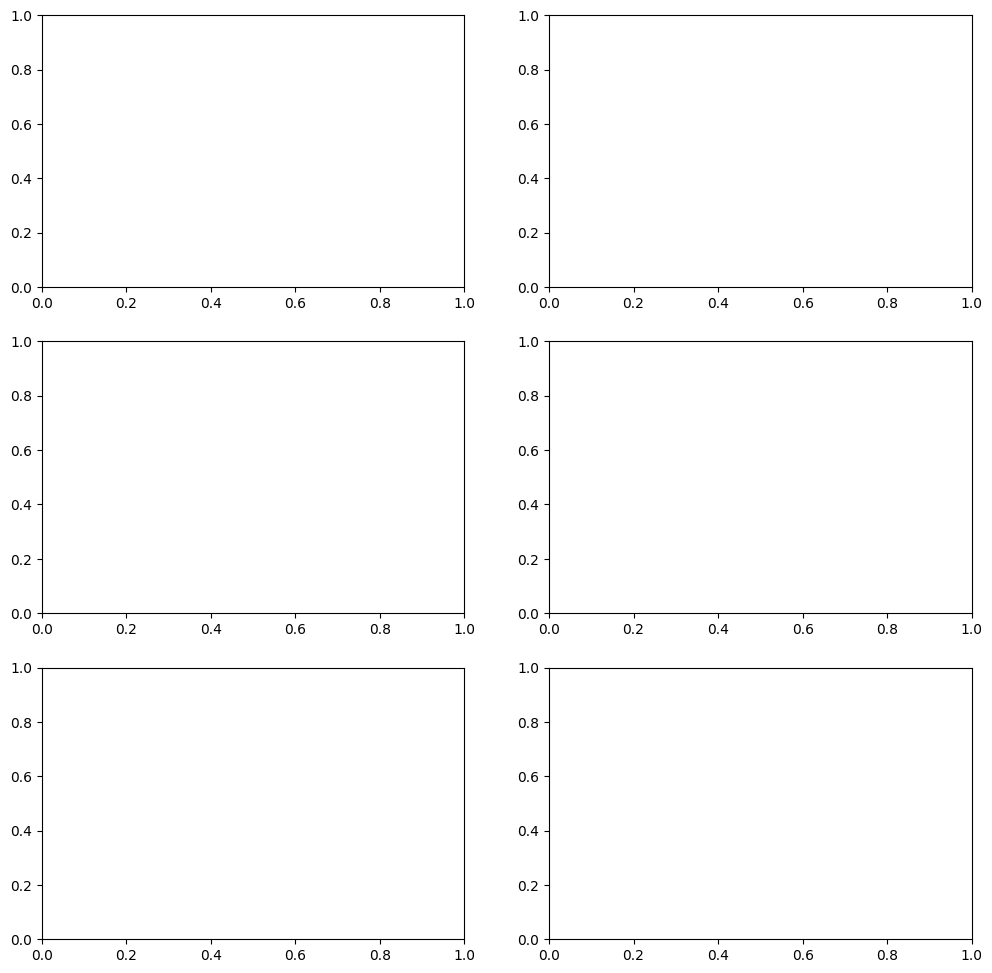

In [21]:
combine_plots(model, words_reduction_plot,
              make_communication_plot,
              lambda model, ax: words_communication_success_first_n(model, ax=ax, attr="mean_reduction_per_token"),
              words_communication_success_first_n,
              words_reduction_plot_first_n,
              make_repairs_plot)

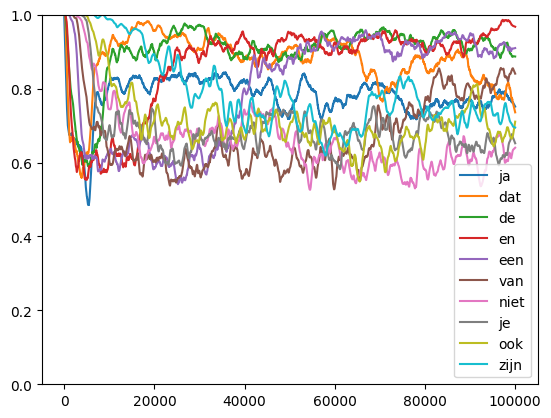

In [197]:
words_communication_success_first_n(model)

KeyError: 'average_vocabulary'

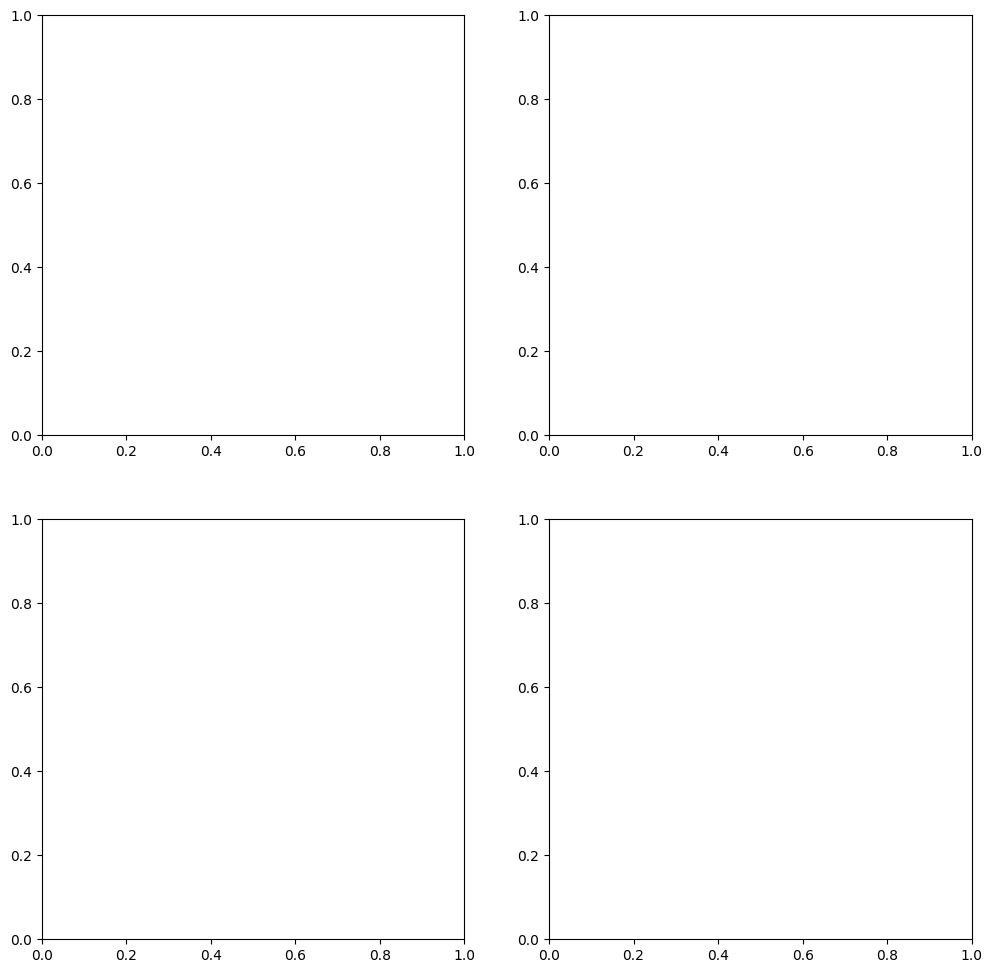

In [40]:
visualisation_meta.make_layout_plot(model, visualisation_meta.make_umap_plot,steps=[1, 1000, 5000, model.steps])

In [1]:
import numpy as np

# Example vocabulary matrix with shape (token_count, dimension_count)
vocabulary_matrix = np.array([[1, 2, 3, 4, 5], [2, 8, 9, 6, 5], [9, 6, 3, 8, 7]])
print(vocabulary_matrix.shape)

# Number of copies you want for each token
num_copies = 5

# Add a new axis and repeat each token (row) 20 times
expanded_vocabulary_matrix = np.tile(vocabulary_matrix[:, np.newaxis, :], (1, num_copies, 1))

token_index = 0
exemplar_index = 5
#expanded_vocabulary_matrix[token_index, exemplar_index, :]

expanded_vocabulary_matrix[token_index, :-1, :] = expanded_vocabulary_matrix[token_index, 1:, :]
expanded_vocabulary_matrix[token_index, -1, :] = [5, 0, 5, 0, 5]
single_agent_r = (expanded_vocabulary_matrix == 0).sum(axis=2).sum(axis=1) / (num_copies * 5)
# Faux copy it a few more times
#np.tile(single_agent_r, (5, 1)).mean(axis=0)

np.zeros(single_agent_r)

(3, 5)


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [119]:
proportion_successful = 1
reduction_count = 1
epsilon = 0.001
u = math.sqrt((proportion_successful * (1 - proportion_successful)) + epsilon / ((reduction_count) + epsilon))
print(u)
k = 4
theta = 0.5
lamb = 3
p_reduce = (1 / (1 + np.exp(-k * (proportion_successful - theta - lamb * u))))
p_reduce

0.0316069770620507


0.8348938892334717